# A graph perspective

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import networkx as nx

import pyrepseq as prs
import pyrepseq.plotting as prsp

plt.style.use('tcrspace.mplstyle')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
prng = np.random.RandomState(123)

In [3]:
# subsampling probability
p = 0.5

In [4]:
# generate 100 notional sequences
# these are indexed by numbers ranging from 0 to 50
sequences = prng.choice(np.arange(50), size=100)

In [5]:
# Create graph
nodes = np.arange(len(sequences))
edges = []
for i in range(len(sequences)):
    for j in range(i+1, len(sequences)):
        if sequences[i] == sequences[j]:
            edges.append([i, j])
edges = np.array(edges)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.nx_agraph.graphviz_layout(G)

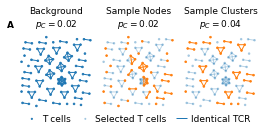

In [6]:
fig, axes = plt.subplots(figsize=(3.42, 1.7), ncols=3, sharex=True, sharey=True)

ax = axes[0]
c = mpl.colors.to_rgba(colors[0])
clight = list(c)
clight[-1] = 0.3
cm = ListedColormap([clight, c])
nx.draw(G, node_size=3, pos=pos, ax=ax,
        node_color=cm(np.ones(len(G.nodes))),
        edge_color=cm(np.ones(len(G.edges)))
       )
pc = 2*len(G.edges)/(len(G.nodes)*(len(G.nodes)-1))
ax.set_title('Background\n$p_C = {pc:.2f}$'.format(pc=pc))

ax = axes[1]
cm = ListedColormap([clight, colors[1]])
chosen = nodes[prng.uniform(size=len(nodes)) < p]
chosen_nodes = np.isin(nodes, chosen).astype(int)
chosen_edges_nt = (np.isin(edges[:, 0], chosen)
                   & np.isin(edges[:, 1], chosen)).astype(int)
nx.draw(G, node_size=3, pos=pos, ax=ax,
        node_color=cm(chosen_nodes),
        edge_color=cm(chosen_edges_nt)
       )
pc = 2*sum(chosen_edges_nt)/(sum(chosen_nodes)*(sum(chosen_nodes)-1))
ax.set_title('Sample Nodes\n$p_C = {pc:.2f}$'.format(pc=pc))


ax = axes[2]
unique_sequences = np.unique(sequences)
chosen = unique_sequences[prng.uniform(size=len(unique_sequences)) < p]
chosen_nodes = np.isin(sequences, chosen).astype(int)
edges_firstelement = sequences[edges[:, 0]]
chosen_edges_aa = np.isin(edges_firstelement, chosen).astype(int)
nx.draw(G, node_size=3, pos=pos, ax=ax,
        node_color=cm(chosen_nodes),
        edge_color=cm(chosen_edges_aa))
pc = 2*sum(chosen_edges_aa)/(sum(chosen_nodes)*(sum(chosen_nodes)-1))
ax.set_title('Sample Clusters\n$p_C = {pc:.2f}$'.format(pc=pc))

handles = [axes[0].get_children()[0],
           axes[1].get_children()[0],
           axes[0].get_children()[1]]
labels = ['T cells', 'Selected T cells', 'Identical TCR']
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.0))

fig.tight_layout(pad=0.0, rect=(0.0, 0.15, 1.0, 1.0))
prsp.label_axes([axes[0]], xy=(-0.1, 1.15))
fig.savefig('figures/raw/figure2A.svg')